In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
nba_stats = "Resources/historical_projections.csv"
finals_stats = "Resources/finals_roster.csv"
winner_stats = "Resources/winners_roster.csv"

# Read the data and the study results
nba = pd.read_csv(nba_stats)
finals = pd.read_csv(finals_stats)
winner = pd.read_csv(winner_stats)


# Combine the data into a single dataset
combined_data = pd.merge(nba, winner, on="Player")
# Display the data table for preview
combined_data.head()

,Player,Position,ID,Draft Year,Projected SPM,Superstar,Starter,Role Player,Bust,Unnamed: 0,...,Pos,Ht,Wt,Birth Date,Nationality,Exp,College,Year,Team,Result
0,James Michael McAdoo,PF,james-michael-mcadoo,2014,-1.073448,0.003533,0.061260,0.361387,0.573821,176,...,PF,6-9,230,"January 4, 1993",us,R,UNC,2015,GSW,win
1,Harrison Barnes,SF,harrison-barnes,2012,0.220674,0.066668,0.358434,0.200095,0.374803,166,...,SF,6-8,225,"May 30, 1992",us,2,UNC,2015,GSW,win
2,Draymond Green,SF,draymond-green,2012,-0.556660,0.002477,0.169969,0.421028,0.406527,170,...,PF,6-6,230,"March 4, 1990",us,2,Michigan State,2015,GSW,win
3,Festus Ezeli,C,festus-ezeli,2012,-1.169516,0.000000,0.057073,0.364573,0.578354,169,...,C,6-11,255,"October 21, 1989",ng,1,Vanderbilt,2015,GSW,win
4,Kawhi Leonard,SF,kawhi-leonard,2011,0.358446,0.073842,0.394673,0.177953,0.353531,160,...,SF,6-7,225,"June 29, 1991",us,2,San Diego State,2014,SAS,win


In [2]:
finals_data = pd.merge(combined_data, finals, on="Player")
finals_data.head()

,Player,Position,ID,Draft Year,Projected SPM,Superstar,Starter,Role Player,Bust,Unnamed: 0,...,no,pos,wt,birth_date,nationality,exp,college,year,team,result
0,James Michael McAdoo,PF,james-michael-mcadoo,2014,-1.073448,0.003533,0.061260,0.361387,0.573821,176,...,20,PF,230,4-Jan-93,us,R,UNC,2015,GSW,win
1,Harrison Barnes,SF,harrison-barnes,2012,0.220674,0.066668,0.358434,0.200095,0.374803,166,...,40,SF,225,30-May-92,us,2,UNC,2015,GSW,win
2,Draymond Green,SF,draymond-green,2012,-0.556660,0.002477,0.169969,0.421028,0.406527,170,...,23,PF,230,4-Mar-90,us,2,Michigan State,2015,GSW,win
3,Festus Ezeli,C,festus-ezeli,2012,-1.169516,0.000000,0.057073,0.364573,0.578354,169,...,31,C,255,21-Oct-89,ng,1,Vanderbilt,2015,GSW,win
4,Kawhi Leonard,SF,kawhi-leonard,2011,0.358446,0.073842,0.394673,0.177953,0.353531,160,...,2,SF,225,29-Jun-91,us,2,San Diego State,2014,SAS,win


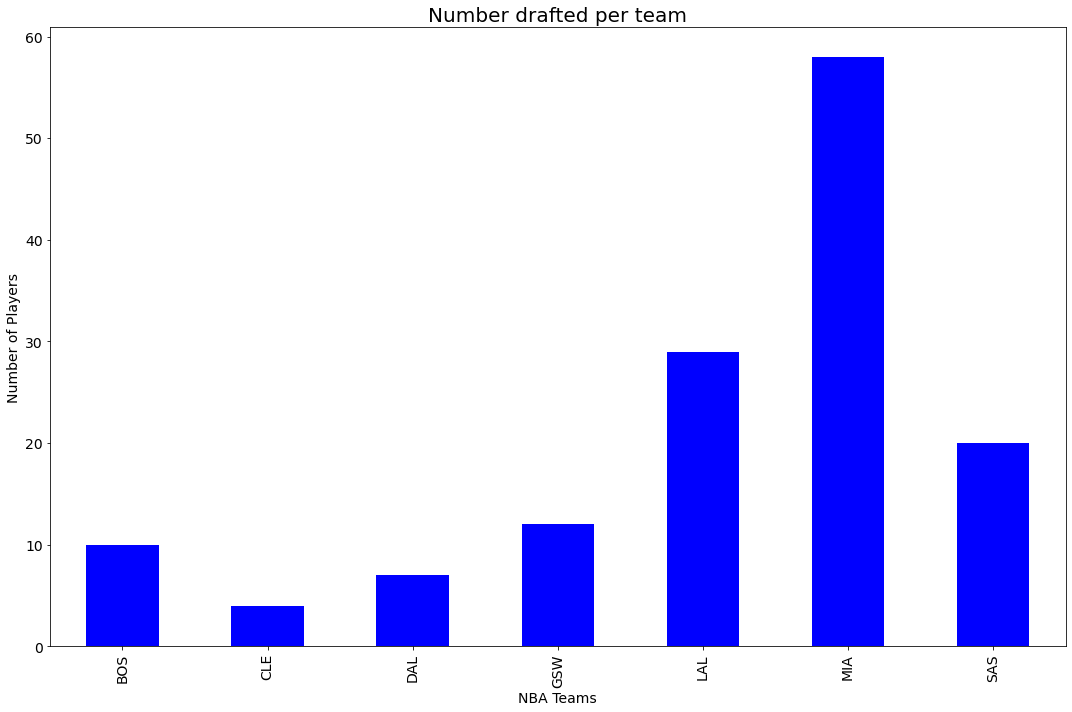

team
BOS    10
CLE     4
DAL     7
GSW    12
LAL    29
MIA    58
SAS    20
Name: Player, dtype: int64

In [3]:
#lets select some columns and make some visuals
bball= finals_data.groupby(["team"]).count()["Player"] 


plot_pandas = bball.plot.bar(figsize=(15,10), color='b',fontsize = 14)
bball
plt.xlabel("NBA Teams",fontsize = 14)
plt.ylabel("Number of Players",fontsize = 14)
plt.title("Number drafted per team",fontsize = 20)

# plt.savefig("../Images/bballteams.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()
bball

ValueError: Unrecognized string bc to axis; try on or off

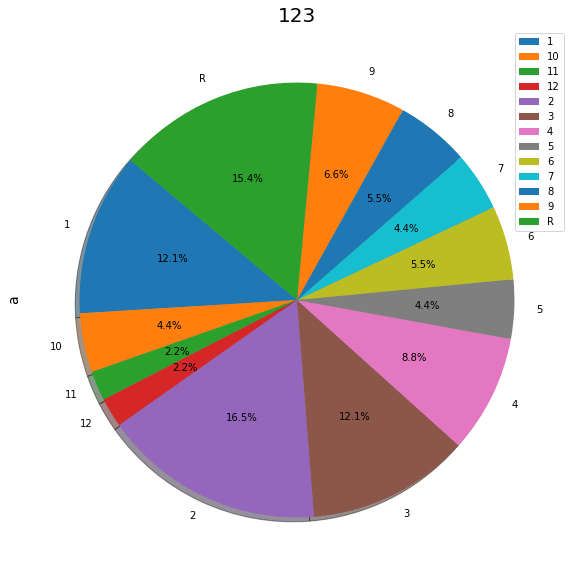

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#  Group by gender and get the number to plot
groupby1 = finals_data.groupby(["Player","exp"])
groupby1
group_df = pd.DataFrame(groupby1.size())

# Create the dataframe with total count of Female and Male mice

exp_pie = pd.DataFrame(group_df.groupby(["exp"]).count())
exp_pie.columns = ["Total Count"]

# create and format the percentage of female vs male
exp_pie["Percentage of exp"] = (100*(exp_pie["Total Count"]/exp_pie["Total Count"].sum()))

# format the "Percentage of Sex" column
exp_pie["Percentage of exp"] = exp_pie["Percentage of exp"]

# gender_df
exp_pie
#  
# colors = ['pink', 'blue']
# explode = (0.1, 0)
plot = exp_pie.plot.pie(y='Total Count',figsize=(15,10), startangle=140, shadow = True, autopct="%1.1f%%")

plt.title('Years of experience starting with R-Rookie',fontsize = 20)
# plt.ylabel('a',fontsize = 14)
# plt.axis("bc",fontsize = 14)

# plt.savefig("../Images/pi_pandas.png", bbox_inches = "tight")
plt.show()